<a href="https://colab.research.google.com/github/hitarthgandhi12/Project/blob/main/Medical_cost_personal_Regresison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import required libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:

#rfead in the insurance dataset 
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#Some columns are  numerical and some are not
insurance["smoker"] , insurance["age"]

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object, 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [ ]:
#Lets try one hot encode our dataframe so its all numbers

insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
#create x and y values (features and labels)
x = insurance_one_hot.drop("charges",axis=1) 
y = insurance_one_hot["charges"]

x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
#create training and test set
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y ,test_size = 0.2,random_state=42)
len(x),len(x_train) , len(x_test),len(y_train),len(y_test)


(1338, 1070, 268, 1070, 268)

In [ ]:
#Build A NN 
tf.random.set_seed(42)

#1.Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)])

#2.Compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

#3.Fit the model
insurance_model.fit(x_train,y_train,epochs=100)


Epoch 1/100
34/34 [==============================] - 3s 9ms/step - loss: 8637.0996 - mae: 8637.0996
Epoch 2/100
34/34 [==============================] - 0s 12ms/step - loss: 7886.7769 - mae: 7886.7769
Epoch 3/100
34/34 [==============================] - 0s 7ms/step - loss: 7558.1475 - mae: 7558.1475
Epoch 4/100
34/34 [==============================] - 0s 8ms/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 9ms/step - loss: 7748.3892 - mae: 7748.3892
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 10ms/step - loss: 7589.9849 - mae: 7589.9849
Epoch 8/100
34/34 [==============================] - 0s 8ms/step - loss: 7698.5591 - mae: 7698.5591
Epoch 9/100
34/34 [==============================] - 0s 12ms/step - loss: 7496.7788 - mae: 7496.7788
Epoch 10/100
34/34 [==============================] - 0s 8ms/step - loss: 7493.1743 - mae: 7493.1

In [ ]:
#check the results of the insurance model on the test data
insurance_model.evaluate(x_test,y_test)                         

9/9 [==============================] - 0s 4ms/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

In [ ]:
y_train.median(),y_train.mean()

(9575.4421, 13346.089736364485)

to try to improve our model 
1. add extra layer with more hidden units and use Adam optimizer
2.Train for longer 


In [ ]:
#set random seed
tf.random.set_seed(42)

#1.create  the model
insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#2 Compile the model
insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
#3 Fit the model
insurance_model_2.fit(x_train,y_train,epochs=100,verbose=1)


Epoch 1/100
34/34 [==============================] - 1s 6ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 7ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 6ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/100
34/34 [==============================] - 0s 6ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7409.0811 - mae:

In [ ]:
#evaluate the larger model
insurance_model_2.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.4956 - mae: 4924.4956


[4924.49560546875, 4924.49560546875]

In [ ]:
insurance_model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

In [ ]:
#set random seed
tf.random.set_seed(42)

#1.Create a model
insurance_model_3= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2.Compile the model
insurance_model_3.compile(loss= tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#3.Fit the model
history = insurance_model_3.fit(x_train,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [ ]:
#Evaluate our third model
insurance_model_3.evaluate(x_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3488.7854 - mae: 3488.7856


[3488.785400390625, 3488.78564453125]

Text(0.5, 0, 'epochs')

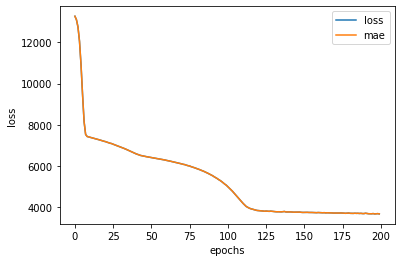

In [ ]:
#plot history(also know as loss or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

###Preprocessing data(normalization and standardization)
Goal of Normalization is to get data in same scale


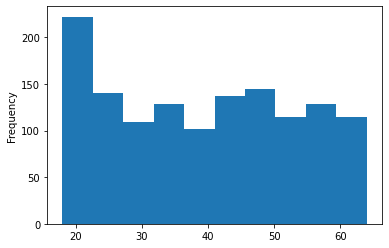

In [ ]:
x["age"].plot(kind="hist")

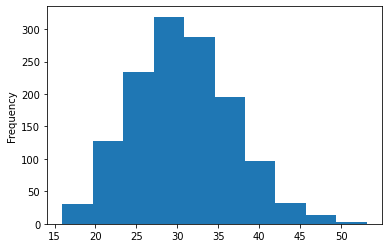

In [ ]:
#Both are in different scale

x["bmi"].plot(kind="hist")

In [ ]:
#Import required libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#reead in the insurance dataset 
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
#Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]), #turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
     )
#create x and y
x=insurance.drop("charges",axis=1)
y=insurance["charges"] 

#build train and test set
x_train , x_test , y_train , y_test =train_test_split(x,y,test_size=0.2)

#fit the column transformer to ouor training data
ct.fit(x_train)

#transform training and test data with normalization
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)


In [ ]:
#what does our data looks like
x_train.loc[0]

KeyError: ignored

In [ ]:
x_train_normal[0]

array([0.56521739, 0.56483723, 0.2       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
x_train

,age,sex,bmi,children,smoker,region
1050,44,female,36.955,1,no,northwest
1224,41,male,23.940,1,no,northeast
734,59,female,32.100,3,no,southwest
1111,38,male,38.390,3,yes,southeast
1167,29,female,24.600,2,no,southwest
...,...,...,...,...,...,...
575,58,female,27.170,0,no,northwest
286,46,female,48.070,2,no,northeast
327,45,male,36.480,2,yes,northwest
1072,21,male,31.255,0,no,northwest


In [ ]:
x_train_normal

array([[0.56521739, 0.56483723, 0.2       , ..., 1.        , 0.        ,
        0.        ],
       [0.5       , 0.21468927, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.89130435, 0.43422115, 0.6       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.58695652, 0.55205811, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.06521739, 0.41148776, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.97826087, 0.15334948, 0.2       , ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
x_train.shape,x_train_normal.shape

((1070, 6), (1070, 11))

Our data has been normalized and one hot encoded now lets build NN model

In [ ]:
#Set random seed
tf.random.set_seed(42)

#1.Build a model
insurance_model_normal=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#3.Compile the model
insurance_model_normal.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics=["mae"])
#4.Fit the model
insurance_model_normal.fit(x_train_normal , y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 13445.0273 - mae: 13445.0273
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 13435.8730 - mae: 13435.8730
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 13414.4863 - mae: 13414.4863
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 13370.3184 - mae: 13370.3184
Epoch 5/200
34/34 [==============================] - 0s 5ms/step - loss: 13292.0059 - mae: 13292.0059
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 13168.6348 - mae: 13168.6348
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 12989.8457 - mae: 12989.8457
Epoch 8/200
34/34 [==============================] - 0s 5ms/step - loss: 12745.6104 - mae: 12745.6104
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 12425.7715 - mae: 12425.7715
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 12025.50

In [ ]:
#evaluate our normal model
insurance_model_normal.evaluate(x_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3524.2815 - mae: 3524.2815


[3524.281494140625, 3524.281494140625]

In [ ]:
#model 3 evaluation
#9/9 [==============================] - 0s 2ms/step - loss: 3488.7854 - mae: 3488.7856
[3488.785400390625, 3488.78564453125]

[3488.785400390625, 3488.78564453125]